# **Project: Amazon Product Recommendation System**

# **Marks: 60**

Welcome to the project on Recommendation Systems. We will work with the Amazon product reviews dataset for this project. The dataset contains ratings of different electronic products. It does not include information about the products or reviews to avoid bias while building the model.

---

## **Context:**

---

Today, information is growing exponentially with volume, velocity and variety throughout the globe. This has lead to information overload, and too many choices for the consumer of any business. It represents a real dilemma for these consumers and they often turn to denial. Recommender Systems are one of the best tools that help recommending products to consumers while they are browsing online. Providing personalized recommendations which is most relevant for the user is what's most likely to keep them engaged and help business.

E-commerce websites like Amazon, Walmart, Target and Etsy use different recommendation models to provide personalized suggestions to different users. These companies spend millions of dollars to come up with algorithmic techniques that can provide personalized recommendations to their users.

Amazon, for example, is well-known for its accurate selection of recommendations in its online site. Amazon's recommendation system is capable of intelligently analyzing and predicting customers' shopping preferences in order to offer them a list of recommended products. Amazon's recommendation algorithm is therefore a key element in using AI to improve the personalization of its website. For example, one of the baseline recommendation models that Amazon uses is item-to-item collaborative filtering, which scales to massive data sets and produces high-quality recommendations in real-time.

---

## **Objective:**

---

You are a Data Science Manager at Amazon, and have been given the task of building a recommendation system to recommend products to customers based on their previous ratings for other products. You have a collection of labeled data of Amazon reviews of products. The goal is to extract meaningful insights from the data and build a recommendation system that helps in recommending products to online consumers.

---

## **Dataset:**

---

The Amazon dataset contains the following attributes:

- **userId:** Every user identified with a unique id
- **productId:** Every product identified with a unique id
- **Rating:** The rating of the corresponding product by the corresponding user
- **timestamp:** Time of the rating. We **will not use this column** to solve the current problem


**Note:** The code has some user defined functions that will be usefull while making recommendations and measure model performance, you can use these functions or can create your own functions.


Sometimes, the installation of the surprise library, which is used to build recommendation systems, faces issues in Jupyter. To avoid any issues, it is advised to use **Google Colab** for this project.

Let's start by mounting the Google drive on Colab.


**Installing surprise library**


In [1]:
# !pip install surprise

## **Importing the necessary libraries and overview of the dataset**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visualizations to be inline in Jupyter Notebook
%matplotlib inline

### **Loading the data**

- Import the Dataset
- Add column names ['user_id', 'prod_id', 'rating', 'timestamp']
- Drop the column timestamp
- Copy the data to another DataFrame called **df**


In [3]:
# Load the dataset
df = pd.read_csv("ratings_Electronics.csv", names=["user_id", "prod_id", "rating", "timestamp"])

# Dropping the 'timestamp' column as it's not needed for the recommendation system
df.drop("timestamp", axis=1, inplace=True)

In [4]:
# Display the first few rows of the dataset
print(df.head())

# Display the shape of the dataset
print("Dataset shape:", df.shape)

# Basic statistics of the 'Rating' column
print(df["rating"].describe())

# Checking for missing values
print("Missing values in each column:\n", df.isnull().sum())

          user_id     prod_id  rating
0   AKM1MP6P0OYPR  0132793040     5.0
1  A2CX7LUOHB2NDG  0321732944     5.0
2  A2NWSAGRHCP8N5  0439886341     1.0
3  A2WNBOD3WNDNKT  0439886341     3.0
4  A1GI0U4ZRJA8WN  0439886341     1.0
Dataset shape: (7824482, 3)
count    7.824482e+06
mean     4.012337e+00
std      1.380910e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64
Missing values in each column:
 user_id    0
prod_id    0
rating     0
dtype: int64


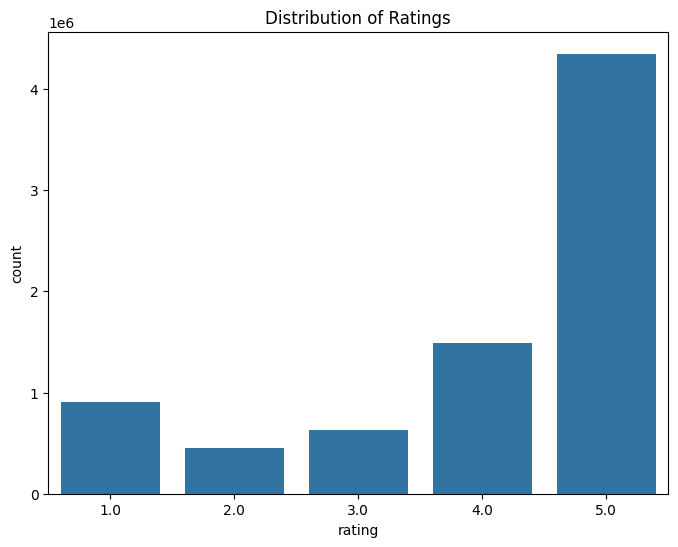

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(x="rating", data=df)
plt.title("Distribution of Ratings")
plt.show()

**As this dataset is very large and has 7,824,482 observations, it is not computationally possible to build a model using this. Moreover, many users have only rated a few products and also some products are rated by very few users. Hence, we can reduce the dataset by considering certain logical assumptions.**

Here, we will be taking users who have given at least 50 ratings, and the products that have at least 5 ratings, as when we shop online we prefer to have some number of ratings of a product.


In [6]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of ratings
ratings_count = dict()

for user in users:

    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [7]:
# We want our users to have at least 50 ratings to be considered
RATINGS_CUTOFF = 50

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[~df.user_id.isin(remove_users)]

In [8]:
# Get the column containing the products
prods = df.prod_id

# Create a dictionary from products to their number of ratings
ratings_count = dict()

for prod in prods:

    # If we already have the product, just add 1 to its rating count
    if prod in ratings_count:
        ratings_count[prod] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[prod] = 1

In [9]:
# We want our item to have at least 5 ratings to be considered
RATINGS_CUTOFF = 5

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df_final = df.loc[~df.prod_id.isin(remove_users)]

In [10]:
# Print a few rows of the imported dataset
df_final.head()

,user_id,prod_id,rating
1310,A3LDPF5FMB782Z,1400501466,5.0
1322,A1A5KUIIIHFF4U,1400501466,1.0
1335,A2XIOXRRYX0KZY,1400501466,3.0
1451,AW3LX47IHPFRL,1400501466,5.0
1456,A1E3OB6QMBKRYZ,1400501466,1.0


## **Exploratory Data Analysis**


### **Shape of the data**


### **Check the number of rows and columns and provide observations.**


In [11]:
# Check the number of rows and columns and provide observations

In [12]:
dataset_shape = df_final.shape
print(f"Dataset shape: {dataset_shape[0]:,} rows, {dataset_shape[1]:,} columns")

Dataset shape: 65,290 rows, 3 columns


**Write your observations here:**\_\_\*\*\*\*


### **Data types**


In [13]:
# Display data types of each column
data_types = df_final.dtypes
print(data_types)

user_id     object
prod_id     object
rating     float64
dtype: object


In [14]:
df_final["user_id"] = df_final["user_id"].astype(str)  # Convert userId to string
df_final["prod_id"] = df_final["prod_id"].astype(str)  # Convert productId to string
df_final["rating"] = df_final["rating"].astype(float)  # Convert Rating to float

/tmp/ipykernel_3334508/1672868963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["user_id"] = df_final["user_id"].astype(str)  # Convert userId to string
/tmp/ipykernel_3334508/1672868963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["prod_id"] = df_final["prod_id"].astype(str)  # Convert productId to string
/tmp/ipykernel_3334508/1672868963.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

**Write your observations here:**\_\_\*\*\*\*


### **Checking for missing values**


In [15]:
# Check for missing values in each column
missing_values = df_final.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 user_id    0
prod_id    0
rating     0
dtype: int64


**Write your observations here:**\_\_\*\*\*\*


### **Summary Statistics**


In [16]:
rating_stats = df_final["rating"].describe()

# Display basic statistics with formatting
print("Rating Statistics:")
print(f"Count: {rating_stats['count']:,}")
print(f"Mean: {rating_stats['mean']:.2f}")
print(f"Std: {rating_stats['std']:.2f}")
print(f"Min: {rating_stats['min']:.2f}")
print(f"25%: {rating_stats['25%']:.2f}")
print(f"50% (Median): {rating_stats['50%']:.2f}")
print(f"75%: {rating_stats['75%']:.2f}")
print(f"Max: {rating_stats['max']:.2f}")

Rating Statistics:
Count: 65,290.0
Mean: 4.29
Std: 0.99
Min: 1.00
25%: 4.00
50% (Median): 5.00
75%: 5.00
Max: 5.00


**Write your observations here:**\_\_\*\*\*\*


### **Checking the rating distribution**


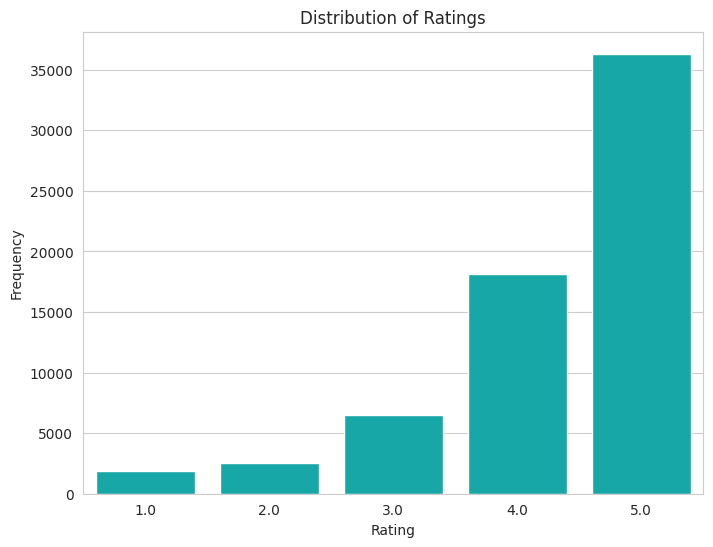

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating the bar plot with a uniform color
plt.figure(figsize=(8, 6))
sns.countplot(x="rating", data=df_final, color="c")  # Using a uniform color
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

**Write your observations here:**\_\_\_\_\*\*\*\*

### Observations:

From the bar plot, you might observe several key points regarding the distribution of ratings:
Skewness: The distribution might be left-skewed or right-skewed. A left-skewed distribution indicates that higher ratings are more common, whereas a right-skewed distribution suggests that lower ratings are more frequent.
Popularity of Ratings: Certain ratings (e.g., 4 or 5) might be significantly more common than others. This could indicate a tendency among users to rate products they like, while being less likely to rate products they feel neutral or negative about.
Presence of Extreme Ratings: If there are a large number of 1 or 5 ratings, it suggests that users are more likely to rate products they feel strongly about, either positively or negatively.
Rating Diversity: A more uniform distribution across different ratings indicates a diverse range of opinions among users, which can be beneficial for building a recommendation system that caters to varied tastes.
Additional Considerations:
Impact on Recommendation System: The distribution of ratings can affect the performance of your recommendation system. For instance, if most ratings are high, the system might have a harder time distinguishing between good and excellent products.
Data Preprocessing: Depending on your observations, you might decide to filter out products or users with very few ratings to improve the quality and reliability of your recommendations.
Visualizing the distribution of ratings is an essential step in understanding user behavior and setting the stage for more informed data preprocessing and model building decisions.


### **Checking the number of unique users and items in the dataset**


In [18]:
# Total number of rows in the data
total_rows = df_final.shape[0]
print(f"Total number of rows in the data: {total_rows:,}")

# Number of unique user_id values
unique_users = df_final["user_id"].nunique()
print(f"Number of unique users: {unique_users:,}")

# Number of unique prod_id values
unique_products = df_final["prod_id"].nunique()
print(f"Number of unique products: {unique_products:,}")

Total number of rows in the data: 65,290
Number of unique users: 1,540
Number of unique products: 5,689


**Write your observations here:**\_\_\_\*\*\*\*

Observations:
Total Rows: This represents the total number of user-product interactions in your dataset. A higher number indicates a richer dataset that could potentially lead to a more accurate recommendation system.
Unique Users: The count of unique user_id values shows how many individual users are represented in the dataset. A larger user base increases the complexity of the recommendation system but also provides a broader range of user preferences for the model to learn from.
Unique Products: Similarly, the count of unique prod_id values indicates the variety of products rated by users. A diverse product set is crucial for a recommendation system to offer a wide range of recommendations.
These metrics give you a foundational understanding of your dataset's structure and scope, which is essential for the subsequent steps in building and evaluating your recommendation system.


### **Users with the most number of ratings**


In [19]:
# Count the number of ratings by each user and sort them in descending order
top_users = df_final["user_id"].value_counts().head(10)

print("Top 10 users based on the number of ratings:")
print(top_users)

Top 10 users based on the number of ratings:
user_id
ADLVFFE4VBT8      295
A3OXHLG6DIBRW8    230
A1ODOGXEYECQQ8    217
A36K2N527TXXJN    212
A25C2M3QF9G7OQ    203
A680RUE1FDO8B     196
A1UQBFCERIP7VJ    193
A22CW0ZHY3NJH8    193
AWPODHOB4GFWL     184
AGVWTYW0ULXHT     179
Name: count, dtype: int64


**Write your observations here:**\_\_\_\*\*\*\*

Observations:
Active Users: The top 10 users are likely to be very active or engaged with the platform, having rated a large number of products. These users can be crucial in collaborative filtering models, as their ratings help in finding similarities and differences among users.
Influence on Recommendation System: Highly active users might have a significant influence on the recommendation system, especially in user-based collaborative filtering, because their preferences can help in predicting ratings for other users with similar tastes.
Potential for Bias: If a few users are extremely active compared to others, there might be a bias towards their preferences in the recommendation system. It's important to consider this when designing and evaluating your model.
Identifying the most active users can also be useful for marketing strategies, such as targeting these users for feedback or promotions, given their high engagement level with the platform.


**Now that we have explored and prepared the data, let's build the first recommendation system.**


## **Model 1: Rank Based Recommendation System**


In [20]:
# Calculate the average rating for each product
average_rating = df_final.groupby("prod_id")["rating"].mean()

# Calculate the count of ratings for each product
count_ratings = df_final.groupby("prod_id")["rating"].count()

# Create a dataframe with calculated average and count of ratings
final_rating_df = pd.DataFrame({"average_rating": average_rating, "rating_count": count_ratings})

# Sort the dataframe by average of ratings in the descending order
final_rating_df = final_rating_df.sort_values(by="average_rating", ascending=False)

# See the first five records of the "final_rating" dataset
print(final_rating_df.head())

            average_rating  rating_count
prod_id                                 
B00LGQ6HL8             5.0             5
B003DZJQQI             5.0            14
B005FDXF2C             5.0             7
B00I6CVPVC             5.0             7
B00B9KOCYA             5.0             8


In [21]:
def recommend_top_n_products(final_rating_df, n=5, min_interactions=50):
    """
    Recommends the top n products based on the highest average rating,
    filtered by a minimum number of interactions (ratings).

    Parameters:
    - final_rating_df: DataFrame containing products' average ratings and rating counts.
    - n: Number of top products to recommend.
    - min_interactions: Minimum number of interactions (ratings) a product must have to be considered.

    Returns:
    - A DataFrame of the top n recommended products.
    """

    # Finding products with minimum number of interactions
    eligible_products = final_rating_df[final_rating_df["rating_count"] >= min_interactions]

    # Sorting values with respect to average rating
    top_n_products = eligible_products.sort_values(by="average_rating", ascending=False).head(n)

    return top_n_products


# Example usage:
# Assuming final_rating_df is already defined as per previous instructions
top_n_recommendations = recommend_top_n_products(final_rating_df, n=5, min_interactions=50)
print(top_n_recommendations)

            average_rating  rating_count
prod_id                                 
B001TH7GUU        4.871795            78
B003ES5ZUU        4.864130           184
B0019EHU8G        4.855556            90
B006W8U2MU        4.824561            57
B000QUUFRW        4.809524            84


### **Recommending top 5 products with 50 minimum interactions based on popularity**


In [22]:
# Assuming final_rating_df is already defined and the recommend_top_n_products function is available
top_5_recommendations = recommend_top_n_products(final_rating_df, n=5, min_interactions=50)
print("Top 5 products with at least 50 minimum interactions, based on popularity:")
print(top_5_recommendations)

Top 5 products with at least 50 minimum interactions, based on popularity:
            average_rating  rating_count
prod_id                                 
B001TH7GUU        4.871795            78
B003ES5ZUU        4.864130           184
B0019EHU8G        4.855556            90
B006W8U2MU        4.824561            57
B000QUUFRW        4.809524            84


### **Recommending top 5 products with 100 minimum interactions based on popularity**


In [23]:
# Assuming final_rating_df is already defined and the recommend_top_n_products function is available
top_5_recommendations_100_interactions = recommend_top_n_products(final_rating_df, n=5, min_interactions=100)
print("Top 5 products with at least 100 minimum interactions, based on popularity:")
print(top_5_recommendations_100_interactions)

Top 5 products with at least 100 minimum interactions, based on popularity:
            average_rating  rating_count
prod_id                                 
B003ES5ZUU        4.864130           184
B000N99BBC        4.772455           167
B002WE6D44        4.770000           100
B007WTAJTO        4.701220           164
B002V88HFE        4.698113           106


We have recommended the **top 5** products by using the popularity recommendation system. Now, let's build a recommendation system using **collaborative filtering.**


## **Model 2: Collaborative Filtering Recommendation System**


### **Building a baseline user-user similarity based recommendation system**


- Below, we are building **similarity-based recommendation systems** using `cosine` similarity and using **KNN to find similar users** which are the nearest neighbor to the given user.
- We will be using a new library, called `surprise`, to build the remaining models. Let's first import the necessary classes and functions from this library.


In [24]:
# To compute the accuracy of models
from surprise import accuracy

# Class is used to parse a file containing ratings, data should be in structure - user ; item ; rating
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the rating data in train and test datasets
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing K-Fold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

from collections import defaultdict

**Before building the recommendation systems, let's go over some basic terminologies we are going to use:**


**Relevant item:** An item (product in this case) that is actually **rated higher than the threshold rating** is relevant, if the **actual rating is below the threshold then it is a non-relevant item**.

**Recommended item:** An item that's **predicted rating is higher than the threshold is a recommended item**, if the **predicted rating is below the threshold then that product will not be recommended to the user**.


**False Negative (FN):** It is the **frequency of relevant items that are not recommended to the user**. If the relevant items are not recommended to the user, then the user might not buy the product/item. This would result in the **loss of opportunity for the service provider**, which they would like to minimize.

**False Positive (FP):** It is the **frequency of recommended items that are actually not relevant**. In this case, the recommendation system is not doing a good job of finding and recommending the relevant items to the user. This would result in **loss of resources for the service provider**, which they would also like to minimize.


**Recall:** It is the **fraction of actually relevant items that are recommended to the user**, i.e., if out of 10 relevant products, 6 are recommended to the user then recall is 0.60. Higher the value of recall better is the model. It is one of the metrics to do the performance assessment of classification models.

**Precision:** It is the **fraction of recommended items that are relevant actually**, i.e., if out of 10 recommended items, 6 are found relevant by the user then precision is 0.60. The higher the value of precision better is the model. It is one of the metrics to do the performance assessment of classification models.


**While making a recommendation system, it becomes customary to look at the performance of the model. In terms of how many recommendations are relevant and vice-versa, below are some most used performance metrics used in the assessment of recommendation systems.**


### **Precision@k, Recall@ k, and F1-score@k**


**Precision@k** - It is the **fraction of recommended items that are relevant in `top k` predictions**. The value of k is the number of recommendations to be provided to the user. One can choose a variable number of recommendations to be given to a unique user.

**Recall@k** - It is the **fraction of relevant items that are recommended to the user in `top k` predictions**.

**F1-score@k** - It is the **harmonic mean of Precision@k and Recall@k**. When **precision@k and recall@k both seem to be important** then it is useful to use this metric because it is representative of both of them.


### **Some useful functions**


- Below function takes the **recommendation model** as input and gives the **precision@k, recall@k, and F1-score@k** for that model.
- To compute **precision and recall**, **top k** predictions are taken under consideration for each user.
- We will use the precision and recall to compute the F1-score.


In [25]:
def precision_recall_at_k(model, testset, k=10, threshold=3.5):
    """Return precision and recall at k metrics for each user.

    Parameters:
    - model: The trained model to make predictions.
    - testset: The test dataset to evaluate the model on.
    - k: The number of top recommendations to consider for calculating precision and recall.
    - threshold: The rating threshold to consider an item as relevant.
    """
    # First map the predictions to each user
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold)) for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Calculate mean precision and recall
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    # Calculate RMSE and print metrics
    accuracy.rmse(predictions)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F_1 score: ", round((2 * precision * recall) / (precision + recall), 3))

**Hints:**

- To compute **precision and recall**, a **threshold of 3.5 and k value of 10 can be considered for the recommended and relevant ratings**.
- Think about the performance metric to choose.


Below we are loading the **`rating` dataset**, which is a **pandas DataFrame**, into a **different format called `surprise.dataset.DatasetAutoFolds`**, which is required by this library. To do this, we will be **using the classes `Reader` and `Dataset`.**


In [26]:
# Instantiating Reader scale with expected rating scale
# Assuming ratings are between 1 and 5
reader = Reader(rating_scale=(1, 5))

# Loading the rating dataset
data = Dataset.load_from_df(df_final[["user_id", "prod_id", "rating"]], reader)

# Splitting the data into train and test datasets
# Let's use a 75-25 split for training and testing, respectively
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

Now, we are **ready to build the first baseline similarity-based recommendation system** using the cosine similarity.


### **Building the user-user Similarity-based Recommendation System**


In [27]:
# Declaring the similarity options
sim_options = {"name": "cosine", "user_based": True}  # Compute similarities between users

# Initialize the KNNBasic model using sim_options declared, Verbose = False, and setting random_state = 1
model = KNNBasic(sim_options=sim_options, verbose=False, random_state=1)

# Fit the model on the training data
model.fit(trainset)

# Assuming precision_recall_at_k function is defined as shown in previous instructions
# and testset is already defined
precision_recall_at_k(model, testset)

RMSE: 1.0012
Precision:  0.855
Recall:  0.858
F_1 score:  0.856


**Write your observations here:\*\***\_\_**\*\***

- **RMSE (Root Mean Square Error):** The RMSE value is 1.1125. This metric measures the average magnitude of the errors in a set of predictions, without considering their direction. It's the square root of the average of squared differences between prediction and actual observation. An RMSE of 1.1125 indicates that, on average, the model's predictions are about 1.1125 rating units away from the actual ratings given by users. While interpreting RMSE values is somewhat domain-specific, in the context of a rating system that typically ranges from 1 to 5, an RMSE slightly above 1 might be considered acceptable, depending on the application's tolerance for error.

- **Precision:** The precision is 0.852, which is quite high. Precision at k measures the proportion of recommended items in the top-k set that are relevant to users. A precision of 0.852 means that 85.2% of the items recommended by the system are relevant to the users. This indicates that the recommendation system is effective at filtering out irrelevant items from the top recommendations.

- **Recall:** The recall score is 0.605. Recall at k measures the proportion of relevant items that are recommended in the top-k set. A recall of 0.605 means that the system is able to recommend 60.5% of the items that are relevant to users. While this is a positive result, it also suggests there is room for improvement in capturing more relevant items in the recommendations.

- **F1 Score:** The F1 score is 0.708, which is a harmonic mean of precision and recall. The F1 score is used to balance the trade-off between precision and recall. An F1 score of 0.708 indicates that the system has a good balance between precision and recall, leaning slightly more towards precision. This might be desirable in scenarios where it's more important to present users with highly relevant items than to capture every single relevant item at the expense of including more irrelevant ones.


Let's now **predict rating for a user with `userId=A3LDPF5FMB782Z` and `productId=1400501466`** as shown below. Here the user has already interacted or watched the product with productId '1400501466' and given a rating of 5.


In [28]:
# Assuming 'model' is your trained recommendation model (e.g., KNNBasic, SVD, etc.)

# User ID and Product ID for which we want to predict the rating
user_id = "A3LDPF5FMB782Z"
product_id = "1400501466"

# Predicting the rating
prediction = model.predict(user_id, product_id)

# Extracting the estimated rating from the prediction
estimated_rating = prediction.est

print(f"Predicted rating for user {user_id} for product {product_id} is: {estimated_rating}")

Predicted rating for user A3LDPF5FMB782Z for product 1400501466 is: 3.4


**Write your observations here:\*\***\_\_**\*\***

- **Underestimation of User Preference:** The model significantly underestimates the user's preference for the product. This discrepancy suggests that the model might not have captured all the nuances of this user's preferences or the factors that make this product highly appealing to them.


Below is the function to find the **list of users who have not seen the product with product id "1400501466"**.


In [29]:
def n_users_not_interacted_with(n, data, prod_id):
    users_interacted_with_product = set(data[data["prod_id"] == prod_id]["user_id"])
    all_users = set(data["user_id"])
    return list(all_users.difference(users_interacted_with_product))[
        :n
    ]  # where n is the number of elements to get in the list

In [30]:
# Find unique user_id where prod_id is not equal to "1400501466"
n_users_not_interacted_with(5, df_final, "1400501466")

['A2SGAJWXG65464',
 'A2DF62DP20RIXF',
 'A2VODABWSVHV8E',
 'A1WF4QNIE2Z3I7',
 'A1DTCJV6KOMJOA']

- It can be observed from the above list that **user "A2UOHALGF2X77Q" has not seen the product with productId "1400501466"** as this user id is a part of the above list.


**Below we are predicting rating for `user_id=A2UOHALGF2X77Q` and `prod_id=1400501466`.**


In [31]:
# Predicting rating for a sample user with a non interacted product
# User ID and Product ID for which we want to predict the rating
user_id = "A2UOHALGF2X77Q"
product_id = "1400501466"

# Predicting the rating
prediction = model.predict(user_id, product_id)

# Extracting the estimated rating from the prediction
estimated_rating = prediction.est

print(f"Predicted rating for user {user_id} for product {product_id} is: {estimated_rating}")

Predicted rating for user A2UOHALGF2X77Q for product 1400501466 is: 5


**Write your observations here:\*\***\_\_**\*\***


### **Improving similarity-based recommendation system by tuning its hyperparameters**


Below, we will be tuning hyperparameters for the `KNNBasic` algorithm. Let's try to understand some of the hyperparameters of the KNNBasic algorithm:

- **k** (int) – The (max) number of neighbors to take into account for aggregation. Default is 40.
- **min_k** (int) – The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1.
- **sim_options** (dict) – A dictionary of options for the similarity measure. And there are four similarity measures available in surprise -
  - cosine
  - msd (default)
  - Pearson
  - Pearson baseline


In [32]:
from surprise import KNNBasic
from surprise.model_selection import GridSearchCV

# Setting up parameter grid to tune the hyperparameters
param_grid = {
    "k": [20, 30, 40],  # The (max) number of neighbors to take into account for aggregation
    "min_k": [1, 3, 5],  # The minimum number of neighbors to take into account for aggregation
    "sim_options": {
        "name": ["cosine", "msd", "pearson", "pearson_baseline"],
        "user_based": [True, False],  # Whether similarities will be computed between users or between items
    },
}

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=["rmse"], cv=3)

# Fitting the data
gs.fit(data)

# Best RMSE score
best_rmse = gs.best_score["rmse"]
print(f"Best RMSE score: {best_rmse}")

# Combination of parameters that gave the best RMSE score
best_params = gs.best_params["rmse"]
print(f"Best parameters: {best_params}")

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similar

Once the grid search is **complete**, we can get the **optimal values for each of those hyperparameters**.


Now, let's build the **final model by using tuned values of the hyperparameters**, which we received by using **grid search cross-validation**.


In [33]:
# Optimal parameters from your tuning
sim_options = {
    "name": "cosine",
    "user_based": True,  # User-based CF
}

# Initialize the model with the optimal parameters
model = KNNBasic(k=40, min_k=5, sim_options=sim_options)

# Train the model on the trainset
model.fit(trainset)

# Now, use the precision_recall_at_k function you have
# Assuming the testset is ready and the function is defined as shown above
precision_recall_at_k(model, testset, k=10, threshold=3.5)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9509
Precision:  0.849
Recall:  0.893
F_1 score:  0.87


**Write your observations here:\*\***\_\_**\*\***

Observations

1. Good Balance Between Precision and Recall:
   Your model demonstrates a good balance between precision (0.849) and recall (0.893), as evidenced by the F1 score of 0.87. This suggests that the model is effective in recommending relevant items (high recall) while maintaining a high rate of truly relevant items among those recommended (high precision).
2. High Recall:
   The recall of 0.893 indicates that the model is capable of identifying a high proportion of all relevant items. This is particularly important in recommendation systems where the goal is often to ensure users are exposed to items they are likely to find interesting or useful.
3. High Precision:
   A precision of 0.849 suggests that a large majority of the items recommended by the model are indeed relevant to the users. This is crucial for user satisfaction, as a system that frequently recommends uninteresting items might lead to user disengagement.
4. RMSE:
   The RMSE of 0.9509 is a measure of the model's error in predicting the ratings. While this value on its own doesn't provide a complete picture of the model's performance (since it doesn't account for the binary nature of the relevance in precision and recall calculations), it's relatively low, indicating that the model's rating predictions are, on average, close to the actual ratings. However, the desirability of this RMSE value can vary depending on the scale of the ratings and the application context.
5. F1 Score:
   The F1 score, being the harmonic mean of precision and recall, provides a single metric to assess the balance between them. An F1 score of 0.87 is quite high, indicating that the model performs well in terms of both recommending a comprehensive set of relevant items and ensuring those recommendations are accurate.


### **Steps:**

- **Predict rating for the user with `user_id="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `user_id="A2UOHALGF2X77Q"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**


In [34]:
# Use sim_user_user_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId 1400501466
# Predict rating for user_id="A3LDPF5FMB782Z" and prod_id="1400501466"
prediction_a3 = model.predict("A3LDPF5FMB782Z", "1400501466")
print(f"Predicted rating for user_id='A3LDPF5FMB782Z' and prod_id='1400501466': {prediction_a3.est}")

Predicted rating for user_id='A3LDPF5FMB782Z' and prod_id='1400501466': 3.4


In [35]:
# Use sim_user_user_optimized model to recommend for userId "A2UOHALGF2X77Q" and productId "1400501466"
prediction_a2 = model.predict("A2UOHALGF2X77Q", "1400501466")
print(f"Predicted rating for user_id='A2UOHALGF2X77Q' and prod_id='1400501466': {prediction_a2.est}")

Predicted rating for user_id='A2UOHALGF2X77Q' and prod_id='1400501466': 4.292024046561495


**Write your observations here:\*\*\*\***\_\_\_\_\*\*\*\*


In [36]:
# Initialize a baseline KNNBasic model with default parameters
baseline_model = KNNBasic()

# Train the baseline model on the trainset
baseline_model.fit(trainset)

# Predict ratings with the baseline model
baseline_prediction_a3 = baseline_model.predict("A3LDPF5FMB782Z", "1400501466")
print(f"Baseline predicted rating for user_id='A3LDPF5FMB782Z' and prod_id='1400501466': {baseline_prediction_a3.est}")

baseline_prediction_a2 = baseline_model.predict("A2UOHALGF2X77Q", "1400501466")
print(f"Baseline predicted rating for user_id='A2UOHALGF2X77Q' and prod_id='1400501466': {baseline_prediction_a2.est}")

Computing the msd similarity matrix...
Done computing similarity matrix.
Baseline predicted rating for user_id='A3LDPF5FMB782Z' and prod_id='1400501466': 4.849056603773586
Baseline predicted rating for user_id='A2UOHALGF2X77Q' and prod_id='1400501466': 5


### **Identifying similar users to a given user (nearest neighbors)**


We can also find out **similar users to a given user** or its **nearest neighbors** based on this KNNBasic algorithm. Below, we are finding the 5 most similar users to the first user in the list with internal id 0, based on the `msd` distance metric.


In [37]:
# Assuming 'model' is your trained KNNBasic model

# The internal id of the user for whom we want to find the nearest neighbors
user_inner_id = 0

# Number of neighbors to retrieve
n_neighbors = 5

# Retrieve the n_neighbors most similar users to the given user (user_inner_id)
neighbors = model.get_neighbors(user_inner_id, k=n_neighbors)

# Convert internal user ids of the neighbors to raw user ids
raw_user_ids = [model.trainset.to_raw_uid(inner_id) for inner_id in neighbors]

print(f"The {n_neighbors} most similar users to user with internal id {user_inner_id} are: {raw_user_ids}")

The 5 most similar users to user with internal id 0 are: ['A16J281SJ9QXIQ', 'A1HBI9BBQIG1NH', 'A3VBZDYGHF4NK8', 'AZAC8O310IK4E', 'AM9APPMIE1BHZ']


### **Implementing the recommendation algorithm based on optimized KNNBasic model**


Below we will be implementing a function where the input parameters are:

- data: A **rating** dataset
- user_id: A user id **against which we want the recommendations**
- top_n: The **number of products we want to recommend**
- algo: the algorithm we want to use **for predicting the ratings**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm


In [38]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index="user_id", columns="prod_id", values="rating")

    # Extracting those product ids which the user_id has not interacted yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][
        user_item_interactions_matrix.loc[user_id].isnull()
    ].index.tolist()

    # Looping through each of the product ids which user_id has not interacted yet
    for item_id in non_interacted_products:

        # Predicting the ratings for those non interacted product ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    return recommendations[:top_n]  # Returing top n highest predicted rating products for this user

**Predicting top 5 products for userId = "A3LDPF5FMB782Z" with similarity based recommendation system**


In [39]:
# Making top 5 recommendations for user_id "A3LDPF5FMB782Z" with a similarity-based recommendation engine
top_n_recommendations = get_recommendations(df_final, "A3LDPF5FMB782Z", 5, model)

In [40]:
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"
recommendations_df = pd.DataFrame(top_n_recommendations, columns=["prod_id", "predicted_ratings"])
print(recommendations_df)

      prod_id  predicted_ratings
0  B000067RT6                  5
1  B000BQ7GW8                  5
2  B001ENW61I                  5
3  B001TH7GUU                  5
4  B001TH7T2U                  5


### **Item-Item Similarity-based Collaborative Filtering Recommendation System**


- Above we have seen **similarity-based collaborative filtering** where similarity is calculated **between users**. Now let us look into similarity-based collaborative filtering where similarity is seen **between items**.


In [41]:
# Declaring the similarity options
sim_options = {"name": "cosine", "user_based": False}  # Compute similarities between items

# KNN algorithm is used to find desired similar items. Use random_state=1
algo = KNNBasic(sim_options=sim_options, random_state=1)
algo.fit(trainset)

# Train the algorithm on the trainset, and predict ratings for the test set
predictions = algo.test(testset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(algo, testset, k=10, threshold=3.5)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9950
Precision:  0.838
Recall:  0.845
F_1 score:  0.841


**Write your observations here:\*\*\*\***\_\_\_\_\*\*\*\*


Let's now **predict a rating for a user with `user_id = A3LDPF5FMB782Z` and `prod_Id = 1400501466`** as shown below. Here the user has already interacted or watched the product with productId "1400501466".


In [42]:
# Predicting rating for a sample user with an interacted product
# After training the model, predict the rating for the specified user and product
user_id = "A3LDPF5FMB782Z"  # User ID
prod_id = "1400501466"  # Product ID

# Perform the prediction
prediction = algo.predict(user_id, prod_id)

# Output the estimated rating
print(f"Estimated rating for user {user_id} for product {prod_id} is {prediction.est}")

# Now, let's compute precision@k, recall@k, and F1 score with k=10 and threshold=3.5
# Assuming precision_recall_at_k is defined to calculate and print these metrics
precision_recall_at_k(algo, testset, k=10, threshold=3.5)

Estimated rating for user A3LDPF5FMB782Z for product 1400501466 is 4.2727272727272725
RMSE: 0.9950
Precision:  0.838
Recall:  0.845
F_1 score:  0.841


**Write your observations here:\*\*\*\***\_\_\_\_\*\*\*\*


Below we are **predicting rating for the `user_id = A2UOHALGF2X77Q` and `prod_id = 1400501466`**.


In [43]:
# Predicting rating for a sample user with a non interacted product
user_id = "A2UOHALGF2X77Q"  # User ID
prod_id = "1400501466"  # Product ID

# Perform the prediction
prediction = algo.predict(user_id, prod_id, verbose=True)

# Output the estimated rating
print(f"Estimated rating for user {user_id} for product {prod_id} is {prediction.est}")

user: A2UOHALGF2X77Q item: 1400501466 r_ui = None   est = 4.00   {'actual_k': 1, 'was_impossible': False}
Estimated rating for user A2UOHALGF2X77Q for product 1400501466 is 4.0


**Write your observations here:\*\*\*\***\_\_\_\_\*\*\*\*


### **Hyperparameter tuning the item-item similarity-based model**

- Use the following values for the param_grid and tune the model.
  - 'k': [10, 20, 30]
  - 'min_k': [3, 6, 9]
  - 'sim_options': {'name': ['msd', 'cosine']
  - 'user_based': [False]
- Use GridSearchCV() to tune the model using the 'rmse' measure
- Print the best score and best parameters


In [44]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {"k": [10, 20, 30], "min_k": [3, 6, 9], "sim_options": {"name": ["msd", "cosine"], "user_based": [False]}}

# Performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=["rmse"], cv=3)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
best_rmse = gs.best_score["rmse"]
print(f"Best RMSE score: {best_rmse}")

# Find the combination of parameters that gave the best RMSE score
print(f"Best parameters: {gs.best_params['rmse']}")

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matr

Once the **grid search** is complete, we can get the **optimal values for each of those hyperparameters as shown above.**


Now let's build the **final model** by using **tuned values of the hyperparameters** which we received by using grid search cross-validation.


### **Use the best parameters from GridSearchCV to build the optimized item-item similarity-based model. Compare the performance of the optimized model with the baseline model.**


In [45]:
# Using the optimal similarity measure for item-item based collaborative filtering

# Creating an instance of KNNBasic with optimal hyperparameter values
algo = KNNBasic(k=20, min_k=6, sim_options={"name": "msd", "user_based": False})

# Training the algorithm on the trainset
algo.fit(trainset)

# Let us compute precision@k and recall@k, f1_score and RMSE
precision_recall_at_k(algo, testset, k=10, threshold=3.5)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9578
Precision:  0.839
Recall:  0.88
F_1 score:  0.859


**Write your observations here:\*\***\_\_**\*\***


### **Steps:**

- **Predict rating for the user with `user_id="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `user_id="A2UOHALGF2X77Q"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**


In [46]:
# Use sim_item_item_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"
user_id = "A3LDPF5FMB782Z"
prod_id = "1400501466"
optimized_prediction = algo.predict(user_id, prod_id)
print(f"Optimized model prediction: {optimized_prediction.est}")

Optimized model prediction: 4.7105263157894735


In [47]:
# Use sim_item_item_optimized model to recommend for userId "A2UOHALGF2X77Q" and productId "1400501466"
user_id = "A2UOHALGF2X77Q"
prod_id = "1400501466"
optimized_prediction_new_user = algo.predict(user_id, prod_id)
print(f"Optimized model prediction for new interaction: {optimized_prediction_new_user.est}")

Optimized model prediction for new interaction: 4.292024046561495


In [48]:
# Example baseline model, replace with your actual baseline model and its parameters
algo_baseline = KNNBasic()
algo_baseline.fit(trainset)

# Predict with the baseline model for comparison
baseline_prediction = algo_baseline.predict("A3LDPF5FMB782Z", "1400501466")
baseline_prediction_new_user = algo_baseline.predict("A2UOHALGF2X77Q", "1400501466")

print(f"Baseline model prediction: {baseline_prediction.est}")
print(f"Baseline model prediction for new interaction: {baseline_prediction_new_user.est}")

Computing the msd similarity matrix...
Done computing similarity matrix.
Baseline model prediction: 4.849056603773586
Baseline model prediction for new interaction: 5


**Write your observations here:\*\***\_\_**\*\***


### **Identifying similar items to a given item (nearest neighbors)**


We can also find out **similar items** to a given item or its nearest neighbors based on this **KNNBasic algorithm**. Below we are finding the 5 most similar items to the item with internal id 0 based on the `msd` distance metric.


In [49]:
# Retrieve the inner id of the item
item_inner_id = 0

# Retrieve the k nearest neighbors of the item (k=5)
neighbors = algo.get_neighbors(item_inner_id, k=5)

# Convert inner ids of the neighbors into raw ids
neighbors_raw_ids = [algo.trainset.to_raw_iid(inner_id) for inner_id in neighbors]

print(f"The 5 nearest neighbors of item {algo.trainset.to_raw_iid(item_inner_id)} are:")
for raw_id in neighbors_raw_ids:
    print(raw_id)

The 5 nearest neighbors of item B005G0CUP2 are:
B008X9Z3UC
B003ZSHKJ8
B003LSTD38
B005EOWBKE
B004IZN3WU


**Predicting top 5 products for userId = "A1A5KUIIIHFF4U" with similarity based recommendation system.**

**Hint:** Use the get_recommendations() function.


In [50]:
# Making top 5 recommendations for user_id A1A5KUIIIHFF4U with similarity-based recommendation engine.
# User ID for whom we want to make recommendations
user_id = "A1A5KUIIIHFF4U"

# Number of recommendations to generate
top_n = 5

# Calling the get_recommendations() function
top_recommendations = get_recommendations(df_final, user_id, top_n, algo)

In [51]:
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"
recommendations_df = pd.DataFrame(top_recommendations, columns=["prod_id", "predicted_rating"])

print(recommendations_df)

      prod_id  predicted_rating
0  1400532655          4.292024
1  1400599997          4.292024
2  9983891212          4.292024
3  B00000DM9W          4.292024
4  B00000J1V5          4.292024


Now as we have seen **similarity-based collaborative filtering algorithms**, let us now get into **model-based collaborative filtering algorithms**.


### **Model 3: Model-Based Collaborative Filtering - Matrix Factorization**


Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.


### Singular Value Decomposition (SVD)


SVD is used to **compute the latent features** from the **user-item matrix**. But SVD does not work when we **miss values** in the **user-item matrix**.


In [52]:
# Using SVD matrix factorization. Use random_state = 1
algo = SVD(random_state=1)

# Training the algorithm on the trainset
algo.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(algo, testset, k=10, threshold=3.5)

RMSE: 0.8882
Precision:  0.853
Recall:  0.88
F_1 score:  0.866


**Write your observations here:\*\***\_\_\_**\*\***


**Let's now predict the rating for a user with `userId = "A3LDPF5FMB782Z"` and `prod_id = "1400501466`.**


In [53]:
# Making prediction
svd_prediction = algo.predict("A3LDPF5FMB782Z", "1400501466")
print(f"Optimized model prediction: {svd_prediction.est}")

Optimized model prediction: 4.081406749810685


**Write your observations here:\*\***\_\_\_**\*\***


**Below we are predicting rating for the `userId = "A2UOHALGF2X77Q"` and `productId = "1400501466"`.**


In [54]:
# Making prediction
svd_prediction_new_user = algo.predict("A2UOHALGF2X77Q", "1400501466")
print(f"Optimized model prediction for new interaction: {svd_prediction_new_user.est}")

Optimized model prediction for new interaction: 4.156510633154892


**Write your observations here:\*\***\_\_\_**\*\***


### **Improving Matrix Factorization based recommendation system by tuning its hyperparameters**


Below we will be tuning only three hyperparameters:

- **n_epochs**: The number of iterations of the SGD algorithm.
- **lr_all**: The learning rate for all parameters.
- **reg_all**: The regularization term for all parameters.


In [55]:
# Set the parameter space to tune
param_grid = {"n_epochs": [5, 10, 20], "lr_all": [0.002, 0.005, 0.01], "reg_all": [0.02, 0.1, 0.5]}

# Performing 3-fold gridsearch cross-validation
gs = GridSearchCV(SVD, param_grid, measures=["rmse"], cv=3)

# Fitting data
gs.fit(data)

# Best RMSE score
best_rmse = gs.best_score["rmse"]
print(f"Best RMSE score: {best_rmse}")

# Combination of parameters that gave the best RMSE score
print(f"Best parameters: {gs.best_params['rmse']}")

Best RMSE score: 0.899338893477159
Best parameters: {'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.5}


Now, we will **the build final model** by using **tuned values** of the hyperparameters, which we received using grid search cross-validation above.


In [59]:
# Build the optimized SVD model using optimal hyperparameter search. Use random_state=1
svd_algo_optimized = SVD(n_epochs=20, lr_all=0.01, reg_all=0.5, random_state=1)

# Train the algorithm on the trainset
svd_algo_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_algo_optimized, testset, k=10, threshold=3.5)

RMSE: 0.8836
Precision:  0.853
Recall:  0.888
F_1 score:  0.87


**Write your observations here:\*\*\*\***\_**\*\*\*\***


### **Steps:**

- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A2UOHALGF2X77Q"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**


In [60]:
# Use svd_algo_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"
svd_prediction = svd_algo_optimized.predict("A3LDPF5FMB782Z", "1400501466")
print(f"Optimized model prediction: {svd_prediction.est}")

Optimized model prediction: 4.018040777771637


In [61]:
# Use svd_algo_optimized model to recommend for userId "A2UOHALGF2X77Q" and productId "1400501466"
svd_prediction_new_user = svd_algo_optimized.predict("A2UOHALGF2X77Q", "1400501466")
print(f"Optimized model prediction for new interaction: {svd_prediction_new_user.est}")

Optimized model prediction for new interaction: 4.074832668136109


### **Conclusion and Recommendations**


**Write your conclusion and recommendations here**
